# **TMDB Movies Dataset Analysis**

## Key Features of the Dataset
The dataset consists of **20 columns**, grouped as follows:

### Numerical Attributes:
- **`budget`**: The budget allocated for the movie (in USD).
- **`revenue`**: The revenue generated by the movie (in USD).
- **`popularity`**: A metric indicating the movie's popularity score.
- **`runtime`**: Duration of the movie (in minutes).
- **`vote_average`**: Average rating given by viewers.
- **`vote_count`**: Total number of votes received.

### Categorical/Textual Attributes:
- **`genres`**: List of genres the movie belongs to (e.g., Action, Comedy).
- **`original_language`**: Language in which the movie was originally produced.
- **`production_companies`**: Companies involved in producing the movie.
- **`production_countries`**: Countries where the movie was produced.
- **`status`**: Release status of the movie (e.g., Released, In Production).
- **`keywords`**: Descriptive words or phrases associated with the movie.
- **`original_title`**: Movie name in original langauge.
- **`spoken_langauges`**: Languages spoken in the movie.
- **`tagline`**: Brief slogan or phrase for the movie.
- **`title`**: Official name of the movie.

### Date and Other Attributes:
- **`release_date`**: The official release date of the movie.
- **`homepage`**: URL of the movie's official homepage (if available).
- **`overview`**: Brief description of the movie's plot.
- **`id`**: Movie ID.

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast
import matplotlib.ticker as ticker

In [167]:
filepath = r'C:\Users\arifm\Desktop\Digital Futures\Training\Programmatic Data Wrangling\TMDB\TMDB_movies.csv'
df = pd.read_csv(filepath)

In [169]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## **Initial Observations**
1. The dataset contains **4,803 rows** and **20 columns**.
2. Missing values are present in columns like:
   - `homepage` (~64% missing)
   - `tagline` (~18% missing)
   - `release_date` (1 missing value)
   - `overview` (3 missing value)
   - `runtime` (2 missing value)
3. Many features, like `genres`, `production_companies`, `keywords`, `production_countries`, and `spoken_languages`, are stored as JSON-like strings and require parsing for meaningful analysis.

In [172]:
df.shape

(4803, 20)

In [174]:
def null_vals(dataframe):
    '''function to show both number of nulls and the percentage of nulls in the whole column'''
    null_vals = dataframe.isnull().sum() ## How many nulls in each column
    total_cnt = len(dataframe) ## Total entries in the dataframe
    null_vals = pd.DataFrame(null_vals,columns=['null']) ## Put the number of nulls in a single dataframe
    null_vals['percent'] = round((null_vals['null']/total_cnt)*100,3) ## Round how many nulls are there, as %, of the df
    
    return null_vals.sort_values('percent', ascending=False)

In [176]:
null_vals(df)
# df.isnull().sum()

,null,percent
homepage,3091,64.356
tagline,844,17.572
overview,3,0.062
runtime,2,0.042
release_date,1,0.021
budget,0,0.000
vote_average,0,0.000
title,0,0.000
status,0,0.000
spoken_languages,0,0.000


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [180]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### **Null Handling**

In [183]:
missing_runtime_rows = df[df['runtime'].isnull()]
missing_overview_rows = df[df['overview'].isnull()]
missing_release_rows = df[df['release_date'].isnull()]

In [185]:
missing_runtime_rows

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,NaN,"To Be Frank, Sinatra at 100",0.0,0


In [187]:
missing_overview_rows

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,NaN,"To Be Frank, Sinatra at 100",0.0,0
4431,913000,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,292539,[],de,Food Chains,NaN,0.795698,[],[],2014-04-26,0,83.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Food Chains,7.4,8


In [189]:
missing_release_rows

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


In [191]:
df.dropna(subset=['runtime', 'overview', 'release_date'], inplace=True)

In [193]:
null_vals(df)

,null,percent
homepage,3087,64.326
tagline,840,17.504
budget,0,0.000
release_date,0,0.000
vote_average,0,0.000
title,0,0.000
status,0,0.000
spoken_languages,0,0.000
runtime,0,0.000
revenue,0,0.000


In [195]:
df.drop(columns=['homepage', 'tagline'], inplace=True)

In [197]:
null_vals(df)

,null,percent
budget,0,0.0
genres,0,0.0
vote_average,0,0.0
title,0,0.0
status,0,0.0
spoken_languages,0,0.0
runtime,0,0.0
revenue,0,0.0
release_date,0,0.0
production_countries,0,0.0


### **Data Cleaning**

In [200]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

In [202]:
def parse_column(json_str, key):
    try:
        # Safely evaluate the JSON-like string and extract the desired key
        return [item[key] for item in ast.literal_eval(json_str)] # Iterates over the list and extracs the value assocaited with the key
    except:
        # Return an empty list if parsing fails or the value is invalid
        return []

In [204]:
df['production_companies_parsed'] = df['production_companies'].apply(parse_column, key='name')
df['production_countries_parsed'] = df['production_countries'].apply(parse_column, key='name')
df['keywords_parsed'] = df['keywords'].apply(parse_column, key='name')
df['genres_parsed'] = df['genres'].apply(parse_column, key='name')
df['spoken_languages_parsed'] = df['spoken_languages'].apply(parse_column, key='name')

In [206]:
df.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,spoken_languages,status,title,vote_average,vote_count,production_companies_parsed,production_countries_parsed,keywords_parsed,genres_parsed,spoken_languages_parsed
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]","[culture clash, future, space war, space colon...","[Action, Adventure, Fantasy, Science Fiction]","[English, Español]"
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],"[ocean, drug abuse, exotic island, east india ...","[Adventure, Fantasy, Action]",[English]
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]","[spy, based on novel, secret agent, sequel, mi...","[Action, Adventure, Crime]","[Français, English, Español, Italiano, Deutsch]"
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],"[dc comics, crime fighter, terrorist, secret i...","[Action, Crime, Drama, Thriller]",[English]
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,[Walt Disney Pictures],[United States of America],"[based on novel, mars, medallion, space travel...","[Action, Adventure, Science Fiction]",[English]


In [208]:
df.drop(columns=['genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages'], inplace=True)

In [210]:
df.head()

,budget,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,production_companies_parsed,production_countries_parsed,keywords_parsed,genres_parsed,spoken_languages_parsed
0,237000000,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]","[culture clash, future, space war, space colon...","[Action, Adventure, Fantasy, Science Fiction]","[English, Español]"
1,300000000,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],"[ocean, drug abuse, exotic island, east india ...","[Adventure, Fantasy, Action]",[English]
2,245000000,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,Spectre,6.3,4466,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]","[spy, based on novel, secret agent, sequel, mi...","[Action, Adventure, Crime]","[Français, English, Español, Italiano, Deutsch]"
3,250000000,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Dark Knight Rises,7.6,9106,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],"[dc comics, crime fighter, terrorist, secret i...","[Action, Crime, Drama, Thriller]",[English]
4,260000000,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,John Carter,6.1,2124,[Walt Disney Pictures],[United States of America],"[based on novel, mars, medallion, space travel...","[Action, Adventure, Science Fiction]",[English]


## **Analysis**
This analysis seeks to uncover insights into the movie industry by answering the following interconnected questions:

1. *[How has the number of movies released each year changed over time?](#Number_of_movies_released_per_year)*
2. *[Which genres have gained or lost popularity over the years?](#top_5_genre_over_time)*
3. *[What was the budget efficiency for the drama genre?](#Budget_vs_Revenue)*
4. *[What was the average profit of the drama movies throughout the year?](#average_profit)*
5. *[Selected Movies for In-Depth Analysis](#2_movies)*

### **How has the number of movies released each year changed over time?**
<a id='Number_of_movies_released_per_year'></a>

#### **Key points**
1. **1920-1950**: Minimal movie production, reflecting early industry limitations.
2. **1950-1980**: Steady growth as the industry expanded.
3. **1980-2000**: Rapid increase, driven by technological advancements and global distribution.
4. **2000-2010**: Peak production with over 200 movies released annually.
5. **2018-2020**: Decline, likely due to disruptions like COVID-19 pandemic.

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


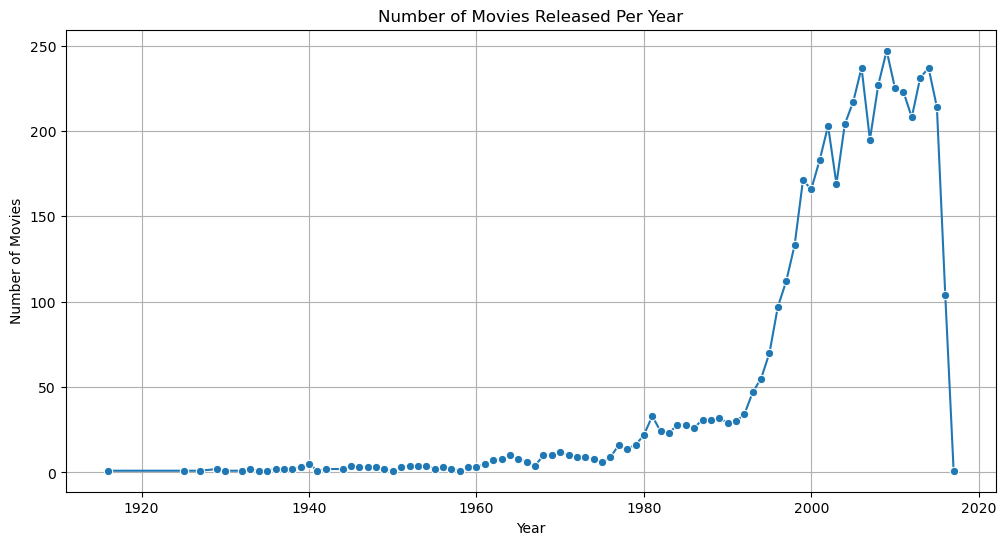

In [215]:
df['release_year'] = df['release_date'].dt.year
release_years = df['release_year'].value_counts().sort_index()

# Convert to a DataFrame for Seaborn plotting
release_years_df = release_years.reset_index()
release_years_df.columns = ['Year', 'Number of Movies'] # where did the number of movies come from

# Create a line plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=release_years_df, x='Year', y='Number of Movies', marker='o')
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid()
plt.show()

### **Which genres have gained or lost popularity over the years?**
<a id='top_5_genre_over_time'></a>

#### **Key Points**

1. **Drama Leads**: Drama consistently outpaces other genres.
2. **Growth (1950-2000)**: All genres saw steady growth, peaking in the 2000s.
3. **Post-2018 Decline**: Movie releases dropped sharply across all genres.

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


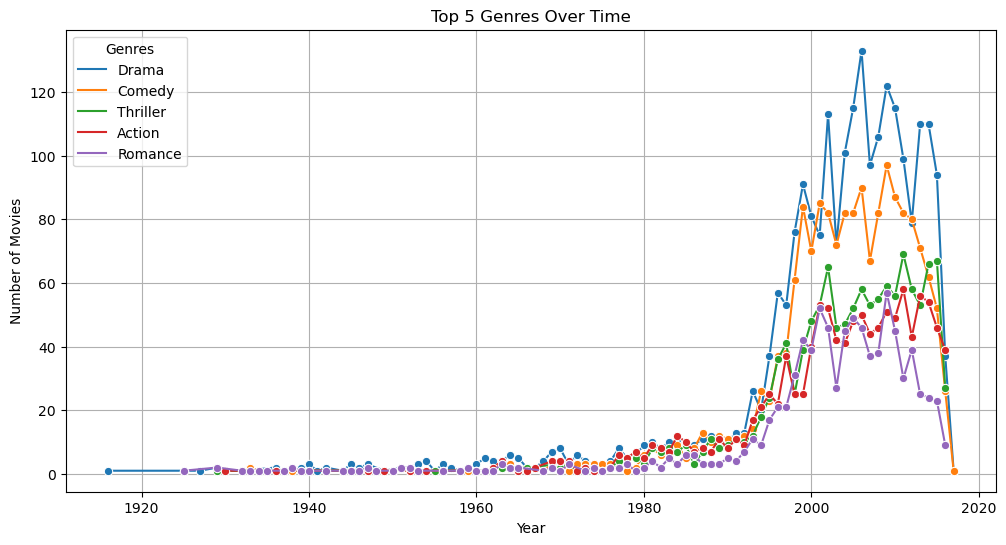

In [219]:
# Flatten the genres and associate them with release years
df_genres = df.explode('genres_parsed')

# Group by release_year and genres_parsed, then count occurrences
genre_trends = df_genres.groupby(['release_year', 'genres_parsed']).size().unstack() # unstack() reshapes the grouped data so that genres_parsed becomes columns, and the release_uear remains the rows

# Identify the top 5 genres by total counts
top_genres = genre_trends.sum().sort_values(ascending=False).head(5).index

# Filter the data for only the top 5 genres
top_genres_trends = genre_trends[top_genres].reset_index().melt(id_vars='release_year', var_name='Genre', value_name='Count') # .melt() converts the wide format into long format for visualisation

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_genres_trends, x='release_year', y='Count', hue='Genre', marker='o')
plt.title('Top 5 Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title="Genres")
plt.grid()
plt.show()

### **What was the budget efficiency for the drama genre?**
<a id='Budget_vs_Revenue'></a>

#### **Key Points**

1. Most drama movies have budgets under **$50 million** with vaired revenue
2. High-budget films **(150 million+)** often achieve higher revenues.
3. Low-budget films can still be highly profitable.

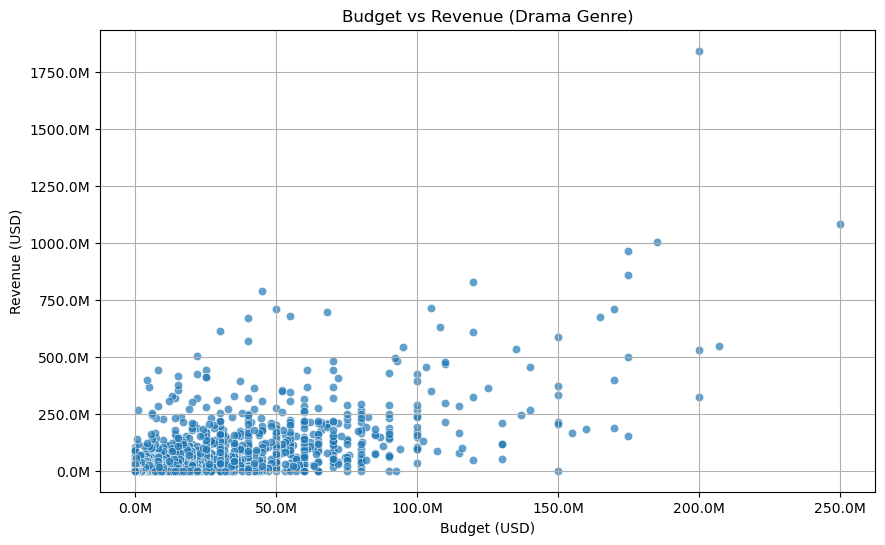

In [223]:
# Filter the dataset for movies in the Drama genre
df_drama = df[df['genres_parsed'].apply(lambda genres: 'Drama' in genres if genres else False)]

# Scatter plot of budget vs revenue for Drama genre
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df_drama, alpha=0.7)
plt.title('Budget vs Revenue (Drama Genre)')
plt.xlabel('Budget (USD)')
plt.ylabel('Revenue (USD)')

# Update the x and y axes to display values in millions
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))  # X-axis in millions
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y/1e6:.1f}M'))  # Y-axis in millions
plt.grid()

plt.show()
## Change the axes

### **What was the average profit of the drama movies throughout the year**
<a id='average_profit'></a>

#### **Key Points**

1. Peaks in **1935** and **1990** intervals.
2. Steady growth post **1950**, with fluctuations.
3. Stable profits post **2000**.

C:\Users\arifm\AppData\Local\Temp\ipykernel_34808\843205899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drama['profit'] = df_drama['revenue'] - df_drama['budget']
C:\Users\arifm\AppData\Local\Temp\ipykernel_34808\843205899.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drama['five_year_bin'] = (df_drama['release_year'] // 5) * 5


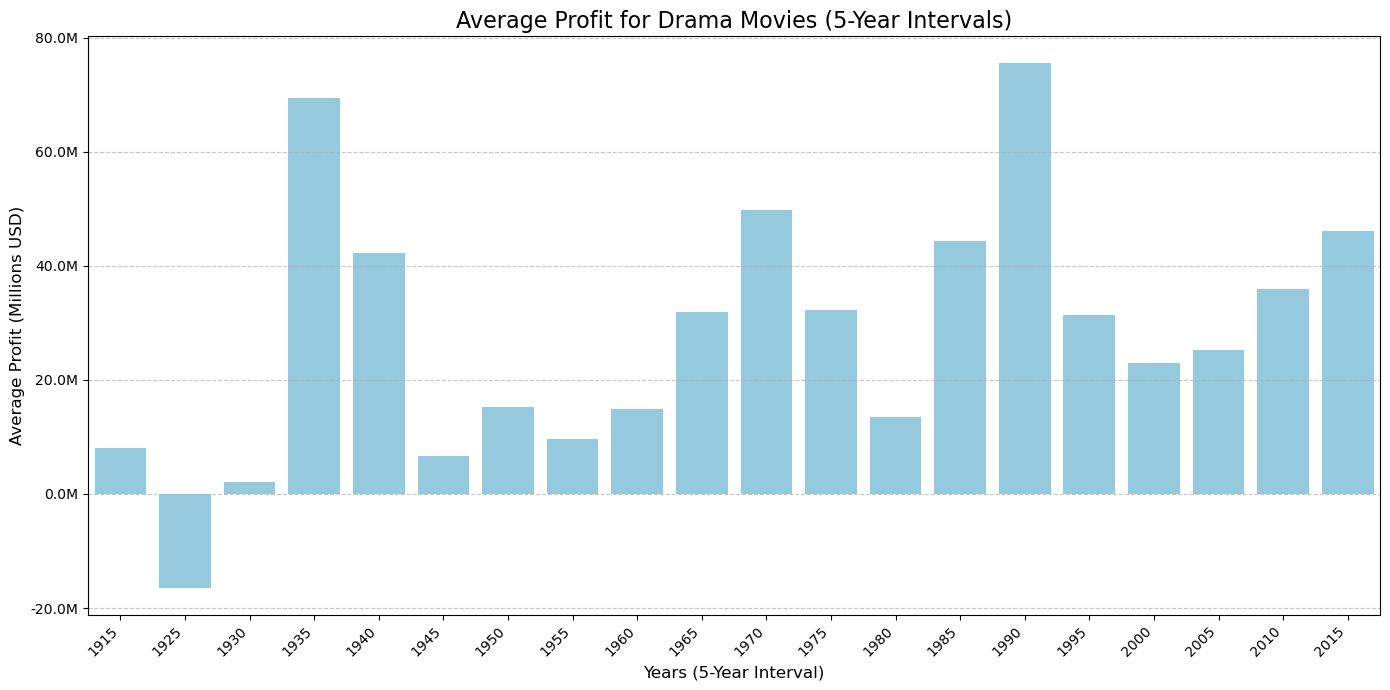

In [227]:
# Calculate profit for Drama movies
df_drama['profit'] = df_drama['revenue'] - df_drama['budget']

# Bin the years into 5-year intervals
df_drama['five_year_bin'] = (df_drama['release_year'] // 5) * 5

# Group by 5-year bins and calculate the average profit
drama_profit_trends = df_drama.groupby('five_year_bin')['profit'].mean().reset_index()

# Plot average profit for Drama movies over time as a bar chart
plt.figure(figsize=(14, 7))
sns.barplot(data=drama_profit_trends, x='five_year_bin', y='profit', color='skyblue')

# Improve the x-axis
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels for readability

# Improve the y-axis formatting
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))  # Format in millions

# Add titles and labels
plt.title('Average Profit for Drama Movies (5-Year Intervals)', fontsize=16)
plt.xlabel('Years (5-Year Interval)', fontsize=12)
plt.ylabel('Average Profit (Millions USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

### **Selected Movies for In-Depth Analysis**
<a id='2_movies'></a>

#### **1. Modern Times (1936)**

##### **Why Selected**
*"Modern Times"* directed and starred in by Charlie Chaplin, is one of the most iconic movies from the 1935 interval. It bridges the silent film era with the sound era and stands out for its cultural relevance and humour. Despite its modest budget, it achieved significant financial and critical success.

##### **What's interesting**
- **Budget Efficiency**:
  Produced on a relatively low budget for the time, *"Modern Times"* showcased Chaplin's talent for creating universally appealing content.
- **Cultural Impact**:
  The movie critiques industrialisation and modern society, offering humour with profound social commentary. Its relevance remains timeless, appealing to generations of audiences.
- **Audience Reception**:
  The film maintains an impressive average rating of **8.1**, highlighting its enduring legacy as a classic.

##### **Comparison to Similar Movies**
- *"Modern Times"* differed from comtemporaries in its era by combining humour and social critique, as opposed to the grand epics that dominated the 1930's.
- Its innovative approach and simplicity, alongside its critique of societal norms, gave it unique appeal and long-lasting impact.
- No other movies in this time period had similar budget and be as successful

---

#### **2. Ghost (1990)**

##### **Why Selected**
"Ghost" directed by Jerry Zucker, is a defining movie of the 1990 interval. It combined romance, suspense, and supernatural elements, captivating audiences and becoming one of the highest-grossing films of its time.

##### **What's Interesting**
- **Revenue Success**:
  Produced with a budget of **~22 million**, "Ghost" earned an extraordinary revenue of **~505 million**, making it one of the most profitable movies of its time.
- **Cultural Impact**:
  The iconic pottery scene, paired with *"Unchained Melody"*, has become a cultural hallmark and remains widely recognised decades later.
- **Audience Reception**:
  With a solid average rating of **6.9**, "Ghost" demonstrated the mass appeal of its unique blend of romance and thriller elements.

##### **Comparison to Similar Movies**
- Unlike other romantic dramas of the time, *"Ghost"* successfully incorporated mystery and supernatural elements to stand out.
- Its exceptional commercial and critical success surpassed many of its contemporaries, showcasing the strength of its storytelling and genre fusion.
- There other movies that had similar budgets but made slightly less than "Ghost" like *"The bodygaurd"* and *"Silence of the Lamb"*

In [231]:
# Filter for Drama movies from the 1935 and 1990 intervals
movies_1935 = df_drama[(df_drama['release_year'] >= 1932) & (df_drama['release_year'] <= 1937)]
movies_1990 = df_drama[(df_drama['release_year'] >= 1987) & (df_drama['release_year'] <= 1992)]

In [233]:
# Sort by profit and select the most profitable movie from each interval
top_movie_1935 = movies_1935.sort_values(by='profit', ascending=False).iloc[0]
top_movie_1990 = movies_1990.sort_values(by='profit', ascending=False).iloc[0]

# Create a DataFrame to store selected movies
selected_movies = pd.DataFrame([top_movie_1935, top_movie_1990])

In [235]:
# Compare key features of the selected movies
comparison = selected_movies[['title', 'release_year', 'budget', 'revenue', 'profit', 'runtime', 
                              'vote_average', 'vote_count', 'popularity', 'genres_parsed']]
comparison

,title,release_year,budget,revenue,profit,runtime,vote_average,vote_count,popularity,genres_parsed
4238,Modern Times,1936,1,8500000,8499999,87.0,8.1,856,28.276480,"[Drama, Comedy]"
2017,Ghost,1990,22000000,505000000,483000000,127.0,6.9,1339,41.967005,"[Fantasy, Drama, Thriller, Mystery, Romance]"


In [237]:
# Find similar movies from each interval based on similar budgets or profits
similar_movies_1935 = movies_1935[(movies_1935['budget'] >= top_movie_1935['budget'] * 0.8) &
                                  (movies_1935['budget'] <= top_movie_1935['budget'] * 1.2)]

similar_movies_1990 = movies_1990[(movies_1990['budget'] >= top_movie_1990['budget'] * 0.8) &
                                  (movies_1990['budget'] <= top_movie_1990['budget'] * 1.2)]

# Summarize similar movies
similar_movies = pd.concat([similar_movies_1935, similar_movies_1990])
similar_movies[['title', 'release_year', 'budget', 'revenue', 'profit', 'runtime', 
                'vote_average', 'vote_count', 'popularity', 'genres_parsed']]


,title,release_year,budget,revenue,profit,runtime,vote_average,vote_count,popularity,genres_parsed
4238,Modern Times,1936,1,8500000,8499999,87.0,8.1,856,28.276480,"[Drama, Comedy]"
1786,Flatliners,1990,26000000,61489265,35489265,115.0,6.3,404,24.114459,"[Drama, Horror, Science Fiction, Thriller]"
1812,Rain Man,1988,25000000,412800000,387800000,133.0,7.6,1709,49.510658,[Drama]
1817,The Bodyguard,1992,25000000,411006740,386006740,129.0,6.1,661,26.576385,"[Thriller, Action, Drama, Music, Romance]"
1828,The Untouchables,1987,25000000,76270454,51270454,119.0,7.6,1384,38.272889,"[Crime, Drama, History, Thriller]"
1847,GoodFellas,1990,25000000,46836394,21836394,145.0,8.2,3128,63.654244,"[Drama, Crime]"
1852,The Last Emperor,1987,23000000,43984230,20984230,163.0,7.4,355,21.189028,"[Drama, History]"
1967,The Fisher King,1991,24000000,41895491,17895491,137.0,7.2,341,16.146572,"[Comedy, Drama]"
2017,Ghost,1990,22000000,505000000,483000000,127.0,6.9,1339,41.967005,"[Fantasy, Drama, Thriller, Mystery, Romance]"
2091,The Silence of the Lambs,1991,19000000,272742922,253742922,119.0,8.1,4443,18.174804,"[Crime, Drama, Thriller]"


## **References**
1. [Modern Times Reference](https://en.wikipedia.org/wiki/Modern_Times_(film))
2. [Ghost Reference](https://en.wikipedia.org/wiki/Ghost_(1990_film))